In [1]:
import pickle
from collections import defaultdict

import pandas as pd

In [2]:
poem_node_counts = pickle.load(open('./poem_lengths.p', 'rb'))
similarity_scores = pickle.load(open('../logic/similarities_map.p', 'rb'))

In [3]:
poem_node_counts

{('0', '1.gpickle'): 206,
 ('0', '10.gpickle'): 241,
 ('0', '100.gpickle'): 225,
 ('0', '101.gpickle'): 235,
 ('0', '102.gpickle'): 266,
 ('0', '103.gpickle'): 192,
 ('0', '104.gpickle'): 223,
 ('0', '105.gpickle'): 193,
 ('0', '106.gpickle'): 252,
 ('0', '107.gpickle'): 228,
 ('0', '108.gpickle'): 248,
 ('0', '109.gpickle'): 179,
 ('0', '11.gpickle'): 199,
 ('0', '110.gpickle'): 204,
 ('0', '111.gpickle'): 198,
 ('0', '112.gpickle'): 202,
 ('0', '113.gpickle'): 168,
 ('0', '114.gpickle'): 234,
 ('0', '115.gpickle'): 210,
 ('0', '116.gpickle'): 219,
 ('0', '117.gpickle'): 211,
 ('0', '118.gpickle'): 215,
 ('0', '119.gpickle'): 217,
 ('0', '12.gpickle'): 251,
 ('0', '120.gpickle'): 210,
 ('0', '121.gpickle'): 159,
 ('0', '122.gpickle'): 225,
 ('0', '123.gpickle'): 225,
 ('0', '124.gpickle'): 255,
 ('0', '125.gpickle'): 255,
 ('0', '126.gpickle'): 272,
 ('0', '127.gpickle'): 226,
 ('0', '128.gpickle'): 257,
 ('0', '129.gpickle'): 211,
 ('0', '13.gpickle'): 227,
 ('0', '130.gpickle'): 248

In [4]:
similarity_scores

{(0, 1): 1.7670986798820574,
 (0, 2): 2.055712784256685,
 (0, 3): 2.0162324565341283,
 (0, 4): 1.189769180568688,
 (0, 5): 0.5972034527099296,
 (0, 6): 0.37457601658149015,
 (0, 7): 1.1671629467068543,
 (0, 8): 0.36123296396633287,
 (0, 9): 1.2844267177930033,
 (0, 10): 0.765481974421326,
 (0, 11): 1.0992896463384336,
 (0, 12): 1.6268309985593727,
 (0, 13): 1.7318091174671877,
 (0, 14): 2.127374545908538,
 (0, 15): 3.00964132635129,
 (0, 16): 2.391083025854945,
 (0, 17): 1.1435139273950237,
 (0, 18): 2.188236891942121,
 (0, 19): 3.961929182640915,
 (0, 20): 1.1571229221890764,
 (0, 21): 1.208806919969886,
 (0, 22): 2.3324255055488536,
 (0, 23): 1.2601206908016012,
 (0, 24): 2.3401957641065,
 (0, 25): 1.5070048787621206,
 (0, 26): 0.5846463637604942,
 (0, 27): 0.7787677967772129,
 (0, 28): 1.975788610519118,
 (0, 29): 1.3439725553208046,
 (0, 30): 1.3590206812767995,
 (0, 31): 1.4943224669932118,
 (0, 32): 2.186759322394973,
 (0, 33): 0.8234622393288589,
 (0, 34): 2.0014923839688756,
 (

In [5]:
poem_counts_hash = defaultdict(dict)
similarity_scores_hash = defaultdict(dict)

for (i_ind, j_file), counts in poem_node_counts.items():
    j_ind = j_file.split('.')[0]
    
    poem_counts_hash[str(i_ind)][str(j_ind)] = counts
    poem_counts_hash[str(j_ind)][str(i_ind)] = counts
    
for (i_ind, j_ind), scores in similarity_scores.items():
    similarity_scores_hash[str(i_ind)][str(j_ind)] = scores
    similarity_scores_hash[str(j_ind)][str(i_ind)] = scores
    
for i in range(246):
    poem_counts_hash[str(i)][str(i)] = 0
    similarity_scores_hash[str(i)][str(i)] = 0

In [6]:
len(poem_counts_hash.keys())

246

In [7]:
len(similarity_scores_hash.keys())

246

In [15]:
d = {str(col): [similarity_scores_hash[str(col)][str(i)] for i in range(246)] for col in range(246)}
similarities_matrix = pd.DataFrame(data=d)

similarities_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,0.000000,1.767099,2.055713,2.016232,1.189769,0.597203,0.374576,1.167163,0.361233,1.284427,...,1.555308,1.417050,0.630855,2.066947,2.014115,2.375809,2.157771,2.457580,6.924507,9.644219
1,1.767099,0.000000,2.352338,1.614396,1.836950,1.379129,1.640645,0.855265,0.025661,1.836197,...,2.431815,1.193523,1.126482,1.527288,1.598615,2.725382,1.520799,2.247067,11.297168,13.686481
2,2.055713,2.352338,0.000000,2.796595,2.478098,1.451286,1.474664,2.103223,0.062939,1.203944,...,2.873439,1.676034,0.925936,1.915975,1.419324,2.898228,1.630611,3.727658,10.244699,13.377349
3,2.016232,1.614396,2.796595,0.000000,2.645822,2.699197,1.491785,1.045822,0.182244,1.615443,...,2.980159,1.579051,0.520230,2.516734,2.476853,3.368615,3.142696,4.154986,13.484398,17.366827
4,1.189769,1.836950,2.478098,2.645822,0.000000,1.838949,1.423938,0.836024,0.171486,1.055476,...,2.835627,2.463118,0.643385,2.066173,1.741091,2.252174,1.664179,2.727333,11.146194,16.231596


In [16]:
for i in range(246):
    print(i)
    for j in range(246):
        if i == j:
            continue
        
        current_similarity_val = similarities_matrix.iloc[[i], [j]]
        similarities_matrix.iloc[[i], [j]] = current_similarity_val / poem_counts_hash[str(i)][str(j)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245


In [22]:
similarities_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,0.000000,0.206732,0.241670,0.205894,0.117997,0.074188,0.049329,0.154552,0.050322,0.164652,...,0.168084,0.141119,0.076785,0.203319,0.191857,0.225420,0.171059,0.173687,0.110884,0.121944
1,0.206732,0.000000,0.484539,0.244697,0.295135,0.289016,0.403463,0.231593,0.007191,0.365720,...,0.373289,0.189235,0.232035,0.216514,0.216441,0.384102,0.177918,0.234433,0.194889,0.183450
2,0.241670,0.484539,0.000000,0.474631,0.400818,0.315098,0.374097,0.569522,0.018275,0.296071,...,0.419694,0.244801,0.202863,0.309898,0.220681,0.431154,0.194542,0.385563,0.177495,0.178611
3,0.205894,0.244697,0.474631,0.000000,0.330383,0.433669,0.270315,0.213595,0.038868,0.259547,...,0.405771,0.193172,0.090851,0.291601,0.298459,0.399917,0.304171,0.360197,0.223810,0.222390
4,0.117997,0.295135,0.400818,0.330383,0.000000,0.295456,0.254198,0.157407,0.035323,0.192703,...,0.365445,0.317438,0.110754,0.264864,0.189865,0.254822,0.161070,0.244343,0.181870,0.207412


In [21]:
max(similarities_matrix.max())

1.0

## Normalize it 

In [20]:
max_val = max(similarities_matrix.max())

for i in range(246):
    print(i)
    for j in range(246):
        if i == j:
            continue
        
        current_similarity_val = similarities_matrix.iloc[[i], [j]]
        similarities_matrix.iloc[[i], [j]] = current_similarity_val / max_val

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245


In [23]:
similarities_matrix.to_pickle('../data/similarities_matrix_df.pkl')

In [34]:
similarities_matrix.nlargest(3, '0').loc[:, '0'].tolist()

[0.34727623371932437, 0.34100719403153323, 0.2994737934317375]

In [37]:
similarities_matrix.nlargest(3, '0').loc[:, '0'].index.tolist()

[206, 19, 230]

In [38]:
list(zip(similarities_matrix.nlargest(3, '0').loc[:, '0'].tolist(), similarities_matrix.nlargest(3, '0').loc[:, '0'].index.tolist()))

[(0.34727623371932437, 206),
 (0.34100719403153323, 19),
 (0.2994737934317375, 230)]

In [40]:
n_largest = dict()
for i in range(len(similarities_matrix)):
    str_ind = str(i)
    
    top_3_vals = similarities_matrix.nlargest(3, str_ind).loc[:, str_ind].tolist()
    top_3_index = similarities_matrix.nlargest(3, str_ind).loc[:, str_ind].index.tolist()
    
    n_largest[str_ind] = list(zip(top_3_vals, top_3_index))

In [41]:
n_largest

{'0': [(0.34727623371932437, 206),
  (0.34100719403153323, 19),
  (0.2994737934317375, 230)],
 '1': [(0.5209703038502173, 117),
  (0.49702492945348575, 80),
  (0.48453896707076566, 2)],
 '2': [(0.5695215443778979, 7),
  (0.5596089873331047, 105),
  (0.559413935576563, 104)],
 '3': [(0.5287204463554462, 145),
  (0.5080406798011541, 104),
  (0.4874260798330522, 196)],
 '4': [(0.5880377940461011, 145),
  (0.47530628738929764, 122),
  (0.4747779667553171, 80)],
 '5': [(0.6338169257986859, 165),
  (0.5964788660852794, 182),
  (0.5666411700574318, 41)],
 '6': [(0.6831824174881604, 91),
  (0.5824528314165736, 7),
  (0.5561491444463164, 117)],
 '7': [(0.9765167845314413, 121),
  (0.6330601197991209, 71),
  (0.5882085262385234, 232)],
 '8': [(0.33562629004935945, 70),
  (0.3236791974324995, 141),
  (0.25476334571525366, 169)],
 '9': [(0.5339737295509893, 43),
  (0.4971137362505867, 106),
  (0.468640278625871, 187)],
 '10': [(0.6157524283496706, 18),
  (0.5442438539213516, 104),
  (0.53233943495

In [44]:
pickle.dump(n_largest, open('n_largest.pkl', 'wb'))

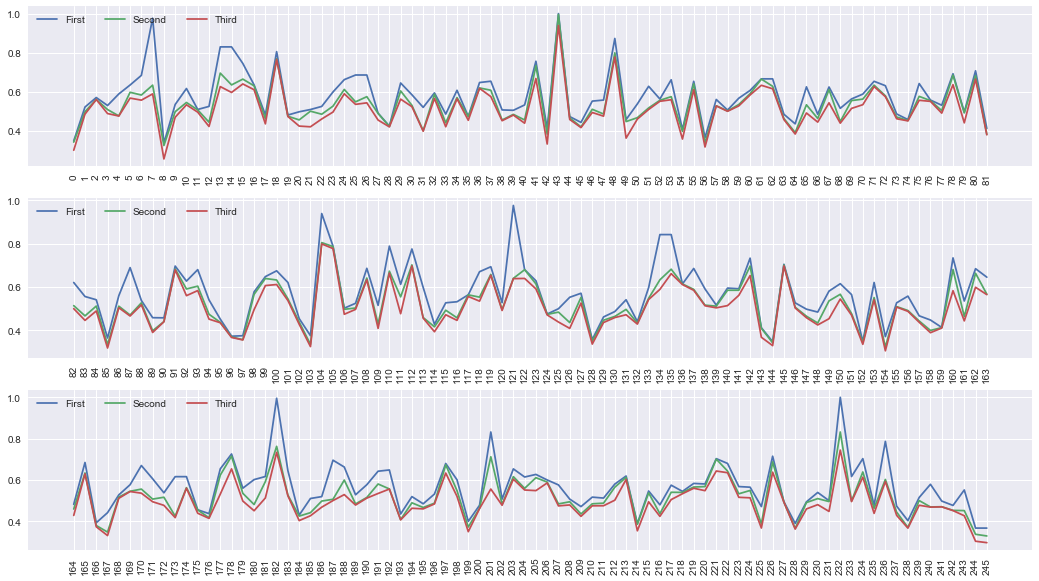

In [80]:
import seaborn as sns

sns.set()

scores = []
for n_set in n_largest.values():
    scores.append([score for score, ind in n_set])

n_largest_keys = list(n_largest.keys())

f = plt.figure(figsize=(18, 10))

base = 82
for i in range(3):
    ax = f.add_subplot(3, 1, i + 1)
    
    # same plotting code as above!
    plt.plot(n_largest_keys[base*i:base*(i+1)], scores[base*i:base*(i+1)])
    plt.legend(['First', 'Second', 'Third'], ncol=3, loc='upper left');
    plt.xticks(rotation=90)
    
plt.show();

In [81]:
n_largest['7']

[(0.9765167845314413, 121),
 (0.6330601197991209, 71),
 (0.5882085262385234, 232)]

In [85]:
similarities_matrix.iloc[[7], [121]]

,121
7,0.976517
